In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip

--2023-03-17 15:32:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1,5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1,47M  1,06MB/s    in 1,4s    

2023-03-17 15:32:06 (1,06 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]



In [2]:
!unzip AirQualityUCI.zip

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


In [1]:
import pandas as pd

In [2]:
ds = pd.read_csv('AirQualityUCI.csv', sep=';')

In [3]:
ds =ds[ds.columns[:-2]]

In [4]:
ds.dropna()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,"3,1",1314.0,-200.0,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,"2,4",1163.0,-200.0,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,"2,4",1142.0,-200.0,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,"2,1",1003.0,-200.0,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [8]:
'1,1'.replace(',','.')


'1.1'

In [9]:
ds[ds.columns[5]] = ds[ds.columns[5]].apply(lambda x: float(str(x).replace(',','.')))

<AxesSubplot:>

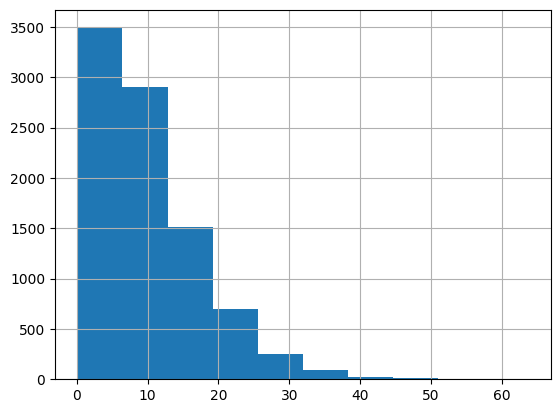

In [10]:
from numpy import NaN
ds[ds.columns[5]].apply(lambda x: None if x <= 0 else x ).dropna().hist()

In [11]:
se = [(ds.columns[4], 0,4000),(ds.columns[5], 0,20)]

In [15]:
t = se[1]

In [16]:
ds[t[0]].apply(lambda x: x>= t[1] and x <=t[2]).mean()

0.8498574596135572

In [17]:
from functools import reduce
def support(ds, iis):
    bit_series = [ds[t[0]].apply(lambda x: x>= t[1] and x <=t[2]) for t in iis]
    return reduce(lambda x, y: x & y, bit_series ).mean()

In [18]:
support(ds, se)

0.08309576602259529